# 03 Adding a sphere

* 구(sphere)를 정의하고 ray가 구를 통과하는지를 확인하는 예제 입니다.

In [1]:
import numpy as np
import numpy.linalg as LA

import matplotlib.pyplot as plt

In [2]:
def normalize(vec: np.array, eps: float = 1e-6):
  return vec / (LA.norm(vec) + eps) 

def blend(color1: np.array, color2: np.array, t: float):
  return (1.0-t)*color1 + t*color2

In [3]:
class Ray:
  def __init__(self, origin: np.array, direction: np.array) -> None:
    self.origin: np.array = origin    
    self.direction: np.array = normalize(direction)

  def at(self, t: float) -> np.array:
    return self.origin + t*self.direction

### 원의 방정식
* 중심이 원점에 있고 반지름이 R인 구의 방정식은 $x^2 + y^2 + z^2 = R^2$으로 나타냅니다.
  * 한 점 $[x, y, z]^\intercal$가 구의 표면에 위치하는 경우에만 $x^2 + y^2 + z^2 = R^2$가 성립합니다.
  * 한 점 $[x, y, z]^\intercal$가 구의 위부에 위치한다면 $x^2 + y^2 + z^2 > R^2$가 되고 반대로 구의 내부에 위치한다면 $x^2 + y^2 + z^2 < R^2$가 됩니다.
* 구의 중심이 $[C_x, C_y, C_z]^\intercal$에 있다면 구의 방정식은 다음과 같이 나타낼수 있습니다.
$$(x-c_x)^2 + (y-c_y)^2 + (z-c_z)^2 = r^2$$
* $\mathbf{C} = (C_x, C_y, c_z)$에서 $\mathbf{P} = (x, y, z)$로 향하는 벡터가 있을때 다음과 같이 나타낼 수 있습니다.
$$(\mathbf{P}-\mathbf{C}) \cdot (\mathbf{P}-\mathbf{C}) = (x - C_x)^2 + (y - C_y)^2 + (z - C_z)^2$$
* 위의 식을 벡터 형식으로 정리하면 $(\mathbf{P}-\mathbf{C}) \cdot (\mathbf{P}-\mathbf{C}) = r^2$가 됩니다.
  * 위의 식을 만족하는 모든 점 $\mathbf{P}$는 구의 표면에 위치 합니다.

### 구와 ray
* 여기서는 Ray가 구와 만나는지 알아보려 합니다.
  * Ray를 $\mathbf{A} + t\mathbf{b} = \mathbf{P}(t)$와 같이 $t$에 대한 함수로 나타낼 수 있습니다.
    * $\mathbf{A}$는 ray의 시작점, $\mathbf{b}$는 ray의 방향을 나타냅니다.
  * 특정 $t$에 대해서 $\mathbf{P}(t)$가 구의 방정식을 만족한다면 ray과 구와 만난다고 할 수 있습니다.
* 다음의 수식 $(\mathbf{P}(t)-\mathbf{C}) \cdot (\mathbf{P}(t)-\mathbf{C}) = r^2$을 만족하는 $t$를 찾습니다.
  * 위의 수식에서 $\mathbf{P}(t)$를 전개하면 다음과 같습니다.
$$(\mathbf{A} + t\mathbf{b}-\mathbf{C}) \cdot (\mathbf{A} + t\mathbf{b}-\mathbf{C}) = r^2$$
  * 위의 수식을 정리하고 대수를 모두 좌측으로 옮기면 다음과 같습니다.
$$ t^2 \mathbf{b} \cdot \mathbf{b} + 2t\mathbf{b} \cdot (\mathbf{A} - \mathbf{C}) + (\mathbf{A} - \mathbf{C}) \cdot (\mathbf{A} - \mathbf{C}) - r^2 = 0$$

<center>
<img src="./images/ray_and_sphere.png" width="500px" height="350px" title="broadcasting"/>
</center>

### 근의 공식
$$ax^2 + bx + c = 0$$
* $a = \mathbf{b} \cdot \mathbf{b}$
* $b = 2 \mathbf{b} \cdot (\mathbf{A} - \mathbf{C})$
* $c = (\mathbf{A} - \mathbf{C}) \cdot (\mathbf{A} - \mathbf{C}) - r^2$
$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$
* 판별식: $b^2 - 4ac$
  * $b^2 - 4ac < 0$: 근 없음
  * $b^2 - 4ac = 0$: 근 하나
  * $b^2 - 4ac > 0$: 근 두 개 

In [4]:
def is_hit_sphere(center: np.array, radius: float, ray: Ray):
  dir_center_to_origin = ray.origin - center
   
  a = np.dot(ray.direction, ray.direction)
  b = 2.0*np.dot(dir_center_to_origin, ray.direction)   
  c = np.dot(dir_center_to_origin, dir_center_to_origin) - radius**2.0

  discriminant = b**2 - 4*a*c
  return discriminant >= 0

### 근의 공식 간단화
$$\frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$
$$ = \frac{-2h \pm \sqrt{(2h)^2 - 4ac}}{2a}$$
$$ = \frac{-2h \pm 2\sqrt{h^2 - ac}}{2a}$$
$$ = \frac{-h \pm \sqrt{h^2 - ac}}{a}$$

* 판별식: $h^2 - ac$
  * $h^2 - ac < 0$: 근 없음
  * $h^2 - ac = 0$: 근 하나
  * $h^2 - ac > 0$: 근 두 개 

In [5]:
def is_hit_sphere(center: np.array, radius: float, ray: Ray):
  dir_center_to_origin = ray.origin - center
   
  a = np.dot(ray.direction, ray.direction)
  half_b = np.dot(dir_center_to_origin, ray.direction)   
  c = np.dot(dir_center_to_origin, dir_center_to_origin) - radius**2.0
  
  discriminant = half_b**2 - a*c
  return discriminant >= 0

* ray_color 함수
  * ray가 구와 만나면 구의 색을 반환
  * ray가 구와 만나지 않으면 배경의 색을 반환

In [6]:
def ray_color(ray: Ray) -> np.array:
  sphere_center = np.array([0, 0, -1])
  if (is_hit_sphere(center=sphere_center, radius=0.5, ray=ray)):
     return np.array([1.0, 0.0, 0.0])

  t = 0.5*(ray.direction[1] + 1.0)
  color1 = np.array([1.0, 1.0, 1.0])
  color2 = np.array([0.5, 0.7, 1.0])
  return blend(color1=color1, color2=color2, t=t)

In [7]:
# image
aspect_ratio = 16.0 / 9.0
image_height = 200
image_width = int(aspect_ratio * image_height)

image = np.zeros([image_height, image_width, 3])

In [8]:
# camera
viewport_height = 2.0
viewport_width = aspect_ratio * viewport_height
focal_length = 1.0

camera_origin = np.array([0.0, 0.0, 0.0])
horizontal_vec = np.array([viewport_width, 0.0, 0.0])
vertical_vec = np.array([0.0, viewport_height, 0.0])
frontal_vec = np.array([0.0, 0.0, focal_length])
lower_left_corner = camera_origin - horizontal_vec/2.0 - vertical_vec/2.0 - frontal_vec

In [9]:
%%time

for row in range(image_height):
  for col in range(image_width):
    u = float(col) / (image_width - 1)
    v = float(row) / (image_height - 1)

    ray = Ray(origin=camera_origin,
              direction=(lower_left_corner + u*horizontal_vec + v*vertical_vec) - camera_origin)
        
    image[row, col] = ray_color(ray)

CPU times: user 1.71 s, sys: 13.4 ms, total: 1.72 s
Wall time: 1.72 s


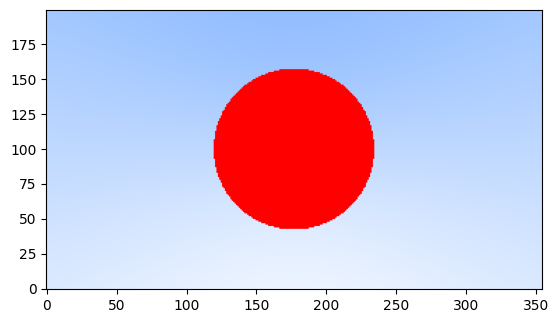

In [10]:
plt.imshow(image, origin='lower')
plt.show()